<a href="https://colab.research.google.com/github/SuminBae97/PytorchStudy/blob/main/For.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import mxnet as mx
from mxnet import gluon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import json

In [2]:
from gluonts.dataset.repository.datasets import get_dataset, dataset_recipes
from gluonts.dataset.util import to_pandas

C:\Users\baesm\Anaconda3\envs\env2\lib\site-packages\gluonts\json.py:46: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [3]:
dataset = get_dataset('m4_hourly',regenerate=True)


saving time-series into C:\Users\baesm\.mxnet\gluon-ts\datasets\m4_hourly\train\data.json
saving time-series into C:\Users\baesm\.mxnet\gluon-ts\datasets\m4_hourly\test\data.json


In [4]:
train = list(dataset.train)
test = list(dataset.test)

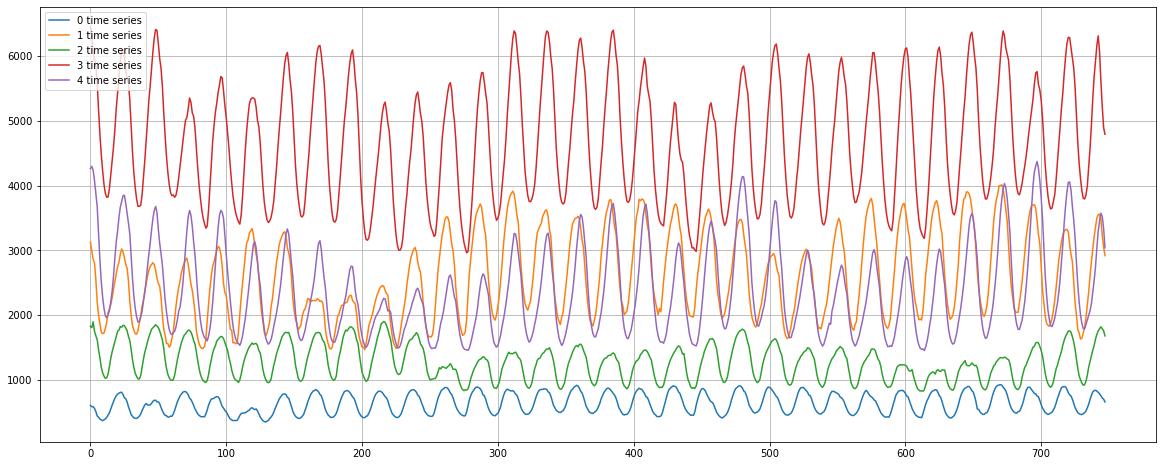

In [5]:
plt.figure(figsize=(20,8))
for i in range(0,5):
    plt.plot(test[i]['target'],label=f'{i} time series')
    #tmp  = to_pandas(train[i])
    
plt.grid(which='both')
plt.legend()

In [6]:
def plot_ax(i):
    plt.figure(figsize=(15,4))
    plt.title(f'{i}th time series')
    plt.plot(to_pandas(test[i]))
    plt.axvline(to_pandas(train[i]).index[-1],color='r')
    plt.grid(which='both')



In [12]:
from gluonts.dataset.common import ListDataset
from gluonts.mx import Trainer
from gluonts.model.deepar import DeepAREstimator
from gluonts.evaluation import make_evaluation_predictions, Evaluator

In [22]:
ar_estimator = DeepAREstimator(
    #예측할 frequency data의 metadata '1h' 호출
    freq = dataset.metadata.freq,
    # 예측 length: 48개의 timeindex 예측
    prediction_length=dataset.metadata.prediction_length, 
    trainer=Trainer(
        epochs=30,
        learning_rate=1e-3,
        num_batches_per_epoch=256
    ),
    context_length=100
)

ar_predictor = ar_estimator.train(dataset.train)


100%|███████████████████████████████████████████████| 256/256 [00:32<00:00,  7.89it/s, epoch=30/30, avg_epoch_loss=3.3]


In [23]:
# from pathlib import Path
# path="C:/Users/baesm/Desktop/notebookfile/deeparm4best"
# ar_predictor.serialize(Path(path))

# # #load
# # from gluonts.model.predictor import Predictor
# # ar_predictor = Predictor.deserialize(Path(path))



In [47]:
import os
curpath = os.getcwd()

In [48]:
curpath

'C:\\Users\\baesm\\Desktop\\notebookfile'

In [49]:
from gluonts.model.predictor import Predictor
path="C:/Users/baesm/Desktop/notebookfile/deepar324"
ar_predictor= Predictor.deserialize(Path(curpath))

# origin_forecast, origin_ts = make_evaluation_predictions(
#     dataset = dataset.test,
#     predictor=origin_predictor,
#     num_samples=100

# )
# origin_forecast = list(origin_forecast)
# origin_ts = list(origin_ts)


# evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
# org_agg_metrics, org_item_metrics = evaluator(iter(origin_ts), iter(origin_forecast), num_series=len(dataset.test))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\baesm\\Desktop\\notebookfile\\type.txt'

In [27]:

origin_forecast, origin_ts = make_evaluation_predictions(
    dataset = dataset.test,
    predictor=ar_predictor,
    num_samples=100

)
origin_forecast = list(origin_forecast)
origin_ts = list(origin_ts)


evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
org_agg_metrics, org_item_metrics = evaluator(iter(origin_ts), iter(origin_forecast), num_series=len(dataset.test))

Running evaluation: 100%|███████████████████████████████████████████████████████████| 414/414 [00:01<00:00, 287.15it/s]


In [29]:
org_agg_metrics

{'MSE': 80491720.14750256,
 'abs_error': 25578229.329416275,
 'abs_target_sum': 145558863.59960938,
 'abs_target_mean': 7324.822041043146,
 'seasonal_error': 336.9046924038305,
 'MASE': 3.123395512604995,
 'MAPE': 0.14694230097995384,
 'sMAPE': 0.1507154344138652,
 'MSIS': 24.441300310671686,
 'QuantileLoss[0.1]': 7746288.539957332,
 'Coverage[0.1]': 0.14266304347826086,
 'QuantileLoss[0.5]': 25578229.544714928,
 'Coverage[0.5]': 0.42190016103059585,
 'QuantileLoss[0.9]': 23542209.29360638,
 'Coverage[0.9]': 0.7196557971014492,
 'RMSE': 8971.717792457728,
 'NRMSE': 1.2248376468652122,
 'ND': 0.1757242994131545,
 'wQuantileLoss[0.1]': 0.05321756675199902,
 'wQuantileLoss[0.5]': 0.17572430089227195,
 'wQuantileLoss[0.9]': 0.16173669339961483,
 'mean_absolute_QuantileLoss': 18955575.79275955,
 'mean_wQuantileLoss': 0.1302261870146286,
 'MAE_Coverage': 0.10036902844873859,
 'OWA': nan}

In [31]:
# def plot_result(i):
#     plt.figure(figsize=(10,7))
#     plt.plot(ts[i][700:].values.reshape(-1,),label='y data')
#     for j in range(10,16):
#         plt.plot(forecast[i].samples[j], label=f'prediction {j}')
#     plt.legend()
#     plt.grid(which='both')    
    
def plot_result(i):
    plt.figure(figsize=(10,7))
    plt.plot(origin_ts[i][700:].values.reshape(-1,), label='y')
    for j in range(10,15):
        plt.plot(origin_forecast[i].samples[j], label=f'prediction {j}')
    plt.legend()
    plt.grid(which='both')

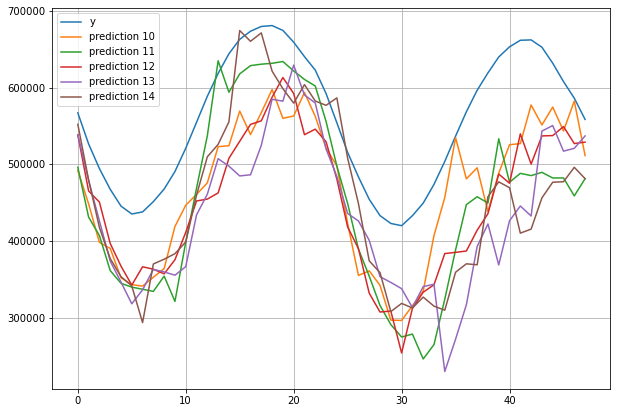

In [32]:
plot_result(120)

In [36]:
forecast[0].samples.shape , ts[0].shape

((100, 48), (748, 1))

In [38]:
def plot_prob_forecast_origin(i,oringin_ts,origin_forecast):
    plot_length=150
    #신뢰구간
    prediction_intervals = (50.0,90.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig,ax = plt.subplots(1,1,figsize=(14,6))
    origin_ts[i][-plot_length:].plot(ax=ax)
    origin_forecast[i].plot(prediction_intervals=prediction_intervals,color='g')
    plt.grid(which='both')
    plt.title(f'{i}th item forecast prediction')
    plt.legend(legend,loc='upper left')
    plt.show()

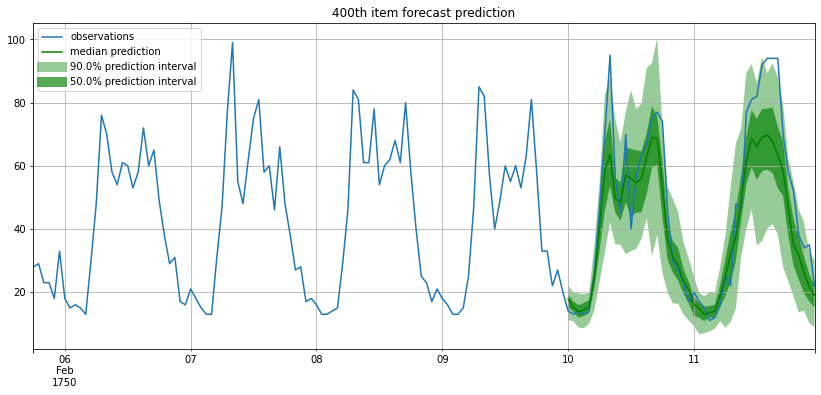

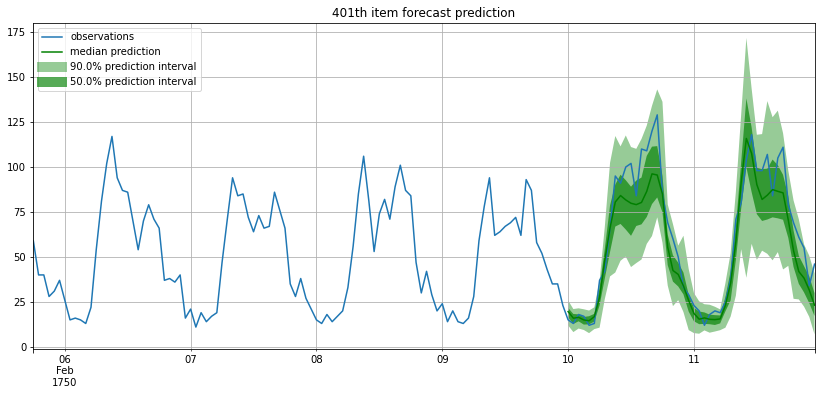

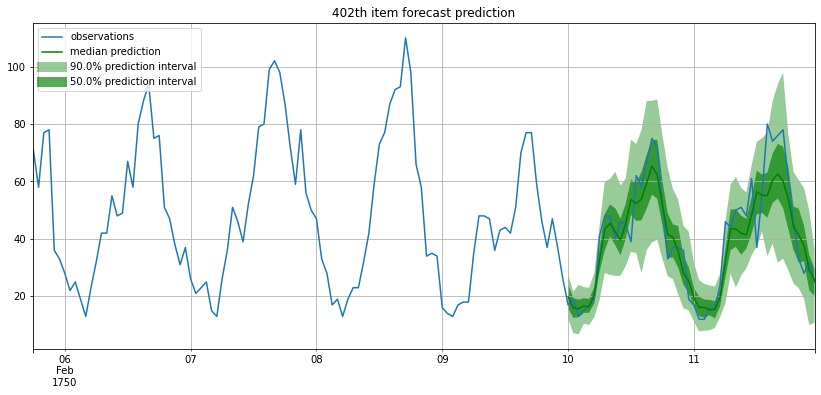

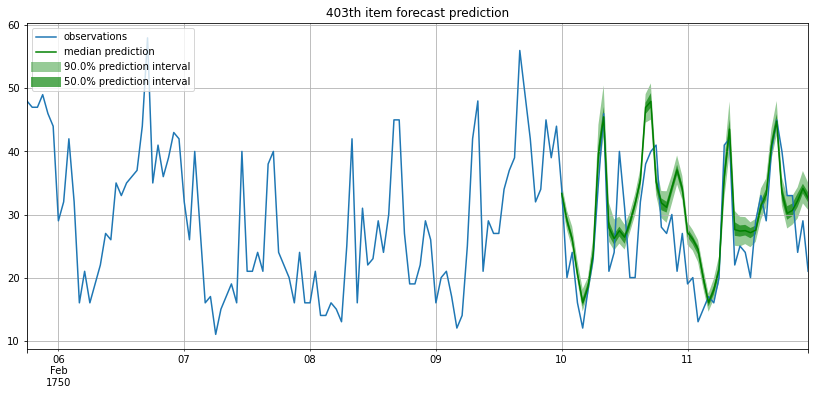

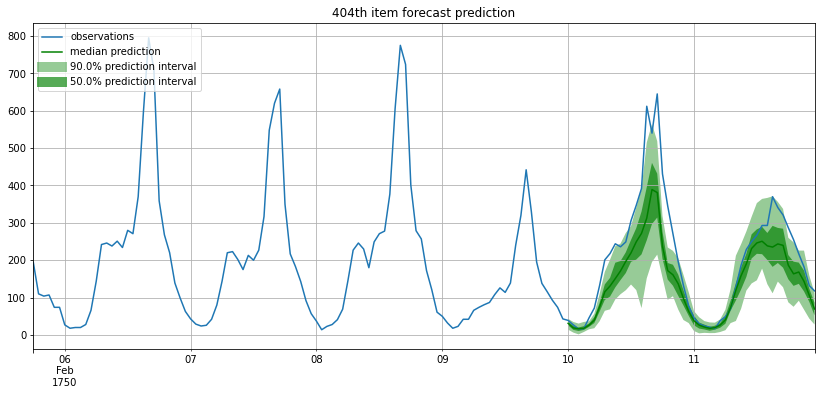

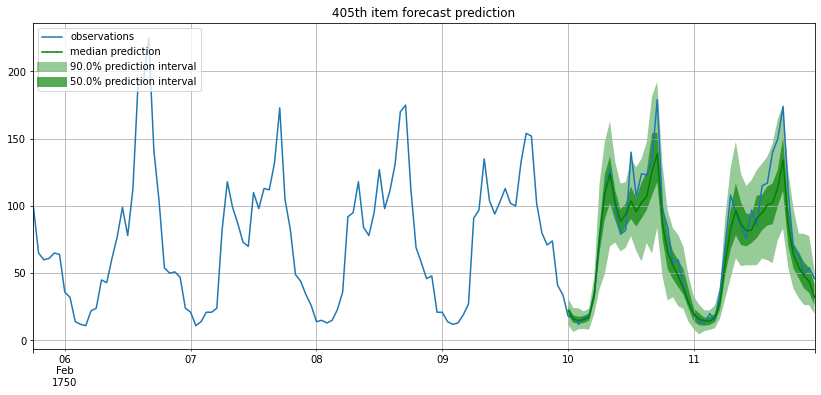

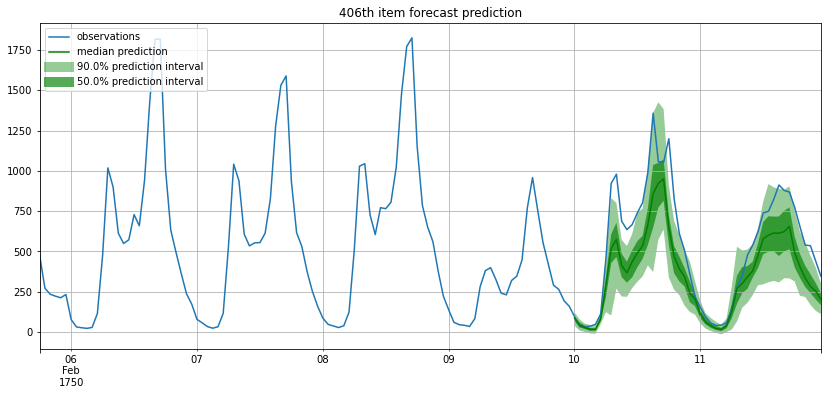

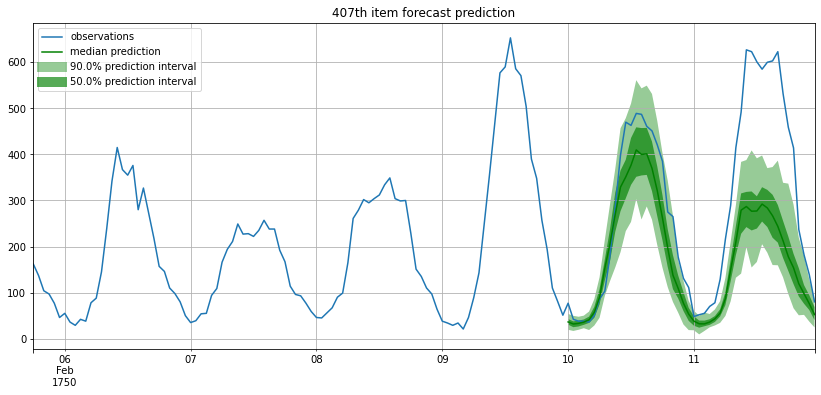

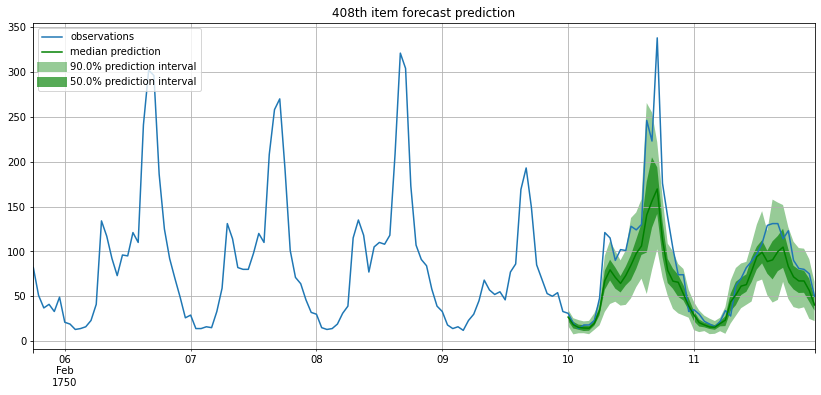

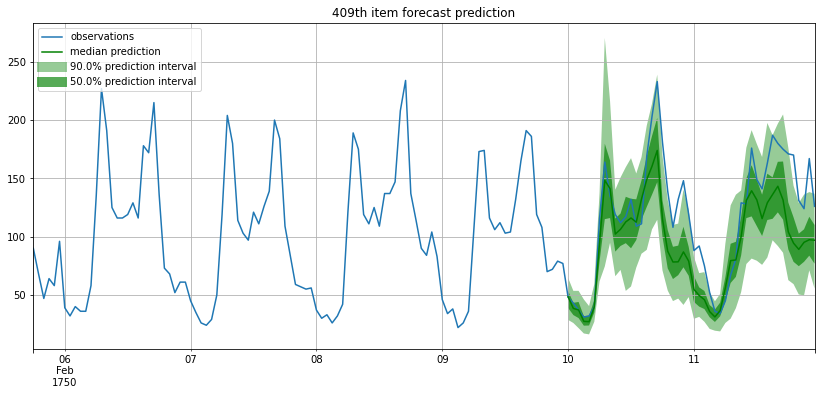

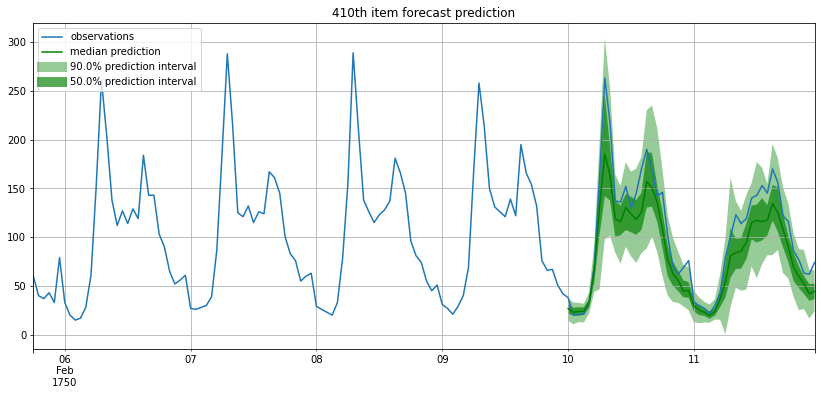

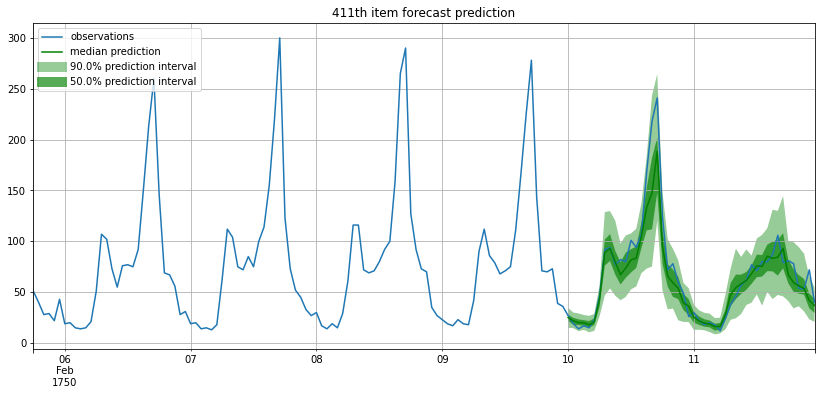

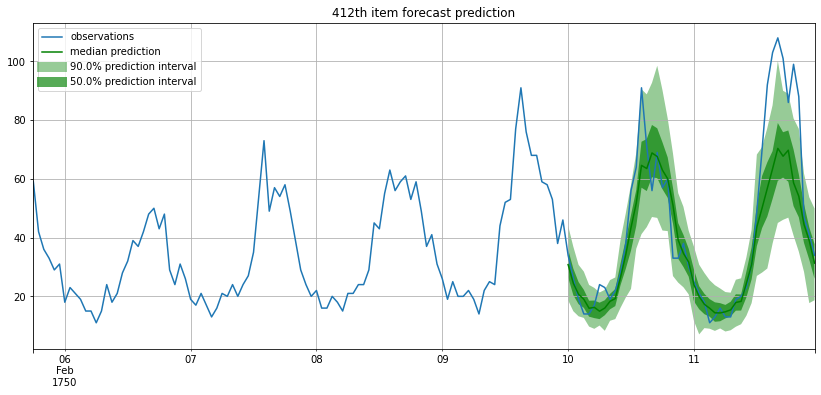

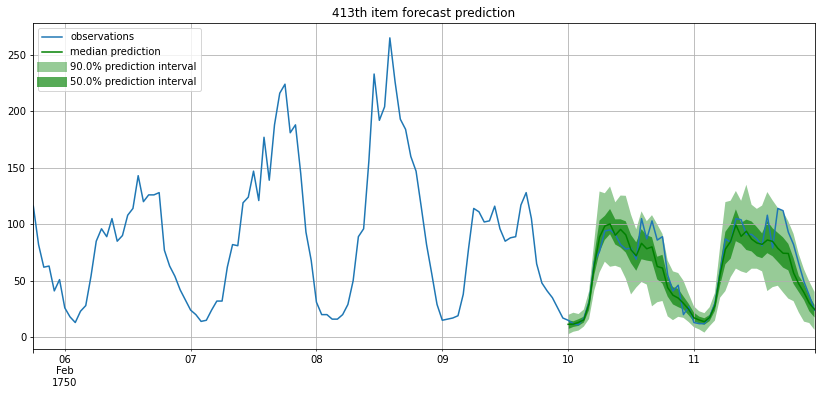

In [40]:
for i in range(400,414):
    plot_prob_forecast_origin(i,origin_ts,origin_forecast)